Project: churn prediction

In [272]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
!wget "$data" -O data-week-3.csv

--2025-12-20 14:34:28--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.1s    

2025-12-20 14:34:29 (7.91 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [273]:
import pandas as pd
import numpy as np
df = pd.read_csv("data-week-3.csv")

# 3.2 Data Preparation

In [274]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [275]:
# transpose to look at columns better
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [276]:
# fix capitalisation of column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# fix capitalisation of categorical values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [277]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [278]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [279]:
# huh. why is seniorcitizen a number?
df.seniorcitizen.unique()

array([0, 1])

In [280]:
# and why is totalcharges an object?
# pd.to_numeric(df.totalcharges) ← this gives an error

In [281]:
# ouch, we replaced spaces with underscores earlier, and in this column space
# means missing value. Let's force errors
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc.isnull().sum()

np.int64(11)

In [282]:
# indeed:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [283]:
# let's fill NaN with 0 and write back to dataframe
tc = tc.fillna(0)
df.totalcharges = tc

In [284]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


In [285]:
# now let's look at the target variable
df.churn.value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [286]:
# let's make it binary instead of yes/no strings
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

# 3.3 Setting Up The Valiation Framework

In [287]:
# This time we use scikit-learn
from sklearn.model_selection import train_test_split
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [288]:
# First, split off the test set 80-20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print(df_full_train.columns)
print(df_test.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')
Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [289]:

# Then split the full train set into train and validation sets 75-25%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(df_train.columns)
print(df_val.columns)
df_train.head().T

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')
Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


,3897,1980,6302,727,5104
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [290]:
df_train.head().T

,3897,1980,6302,727,5104
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [291]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [292]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# note I didn't delete it from the full train set, we'll need it later

# 4 EDA
Exploratory Data Analysis

In [293]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [294]:
df_full_train.churn.value_counts(normalize=True) # global churn rate

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [295]:
global_churn_rate = df_full_train.churn.mean() # the same thing, because it's binary
round(global_churn_rate, 2)

np.float64(0.27)

In [296]:
df_full_train.dtypes # let's look at numerical variables

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [297]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [298]:
categorical = [col for col in df_full_train.columns if col not in numerical + ['customerid', 'churn']]
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [299]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 5 Feature importance

In [300]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [301]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [302]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

So we see that overall churn doesn't change that much between genders

In [303]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [304]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

Looks like people with a partner have somewhat less churn

In [305]:
global_churn - churn_partner, global_churn - churn_no_partner

(np.float64(0.06493474245795922), np.float64(-0.05984095297455855))

So churn is approximately the same by gender, but partnered vs unpartnered has a significant difference.

We can conclude that the `partner` feature is more important!

In [306]:

#instead of looking by the difference by subtracting (absolute terms),
# we can also divide (look at the ratio)
churn_no_partner / global_churn, churn_partner / global_churn
# this is the churn risk ratio - it works in relative terms

(np.float64(1.2216593879412643), np.float64(0.7594724924338315))

In [307]:
# we would like to streamline this, something like this:
# SELECT
#     gender,
#     AVG(churn),
#     AVG(churn) - global_churn AS diff_from_global,
#     AVG(churn) / global_churn AS risk_ratio
# FROM df_full_train
# GROUP BY gender;
#
# in pandas:

df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [308]:
# now we can subtract and divide
df_group['diff_from_global'] = df_group['mean'] - global_churn
df_group['risk_ratio'] = df_group['mean'] / global_churn
df_group

,mean,count,diff_from_global,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [309]:
# Nice. Now let's do it for all categorical variables
from IPython.display import display
for col in categorical:
    print(col)
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff_from_global'] = df_group['mean'] - global_churn
    df_group['risk_ratio'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff_from_global,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff_from_global,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff_from_global,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff_from_global,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff_from_global,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff_from_global,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff_from_global,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff_from_global,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff_from_global,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff_from_global,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff_from_global,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff_from_global,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff_from_global,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff_from_global,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff_from_global,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff_from_global,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Based on all this, we'd like a single number per variable that tells us which variable is more important.

# 6 Feature importance: Mutual information

In [310]:
from sklearn.metrics import mutual_info_score
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

In [311]:
# how much we can learn about churn by knowing the value of 'contract' and vice versa
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [312]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [313]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In the 3 calls above it's evident that `contract` tells us a lot, and `gender` tells us pretty much nothing about churn.


Let's apply this to all features

In [314]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [315]:
# we apply the function to all categorical columns
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [316]:
# let's sort it for clarity
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

The variables with high mutual information with the target variable are **important**. They are the reason why ML models work.

# 7 Feature importance: Correlation

Mutual information helps us with categorical variables. We will now evaluate the importance of numerical columns.

In [317]:
# Correlation is a measure of the degree of dependence between two variables.
# Can be between -1 and 1. Near zero means less correlation.
# Near 1 and -1 means strong correlation (either positive or negative).
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [318]:
# indeed, the longer they stay, the less likely they are to churn:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [319]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [320]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

Clearly the correlation with tenure is negative: more tenure, less churn

In [321]:
# let's look at monthlycharges
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [322]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [323]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

The correlation with monthlycharges is positive: higher charges, more churn

In [324]:
# If we don't care about the sign of the correlation, we can take absolute value
# This gives us the absolute importance of the variable
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# 9 One-hot encoding

We will deal with encoding categorical variables with SciKit-Learn as opposed to manually as we did last time.

Reminder: one hot encoding is encoding the values of a categorical variable into one binary variable each.

Hot variable = activated for this row (binary value 1), cold = not activated for this row (binary value 0).

In [325]:
from sklearn.feature_extraction import DictVectorizer

In [326]:
# let's take a look at the first 100 rows of two categorical columns
# just to see how DictVectorizer works
# first we need to create a list of dictionaries from the dataframe, because
# DictVectorizer works with that format to understand categorical variables
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')
dicts
# I'm including tenure here to show that it works with numerical variables too,
# it just treats them as continuous values and passes them as-is

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [327]:
# For teaching purposes, we don't use sparse matrices.
# This allows us to look the full contents of any row.
# Sparse matrices are more memory efficient for large datasets, because they only
# store non-zero entries. This is especially useful when you have categorical
# variables with many levels, in a one-hot encoded matrix most values are zero.
# Real world applications should use sparse matrices.
dv = DictVectorizer(sparse=False)

In [328]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [329]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [330]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [331]:
# now we can do it for the whole training set
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
# this is how it looks like:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [332]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [333]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [334]:
# this is how our feature matrix looks like
list(dv.transform(train_dicts[:5])[0])

[np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(115.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(72.0),
 np.float64(8425.15)]

In [335]:
# putting it all together
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [336]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# we don't fit on the validation data, we just transform it
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

# 10 Logistic regression

In [337]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [338]:
z = np.linspace(-7, 7, 51)

In [339]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

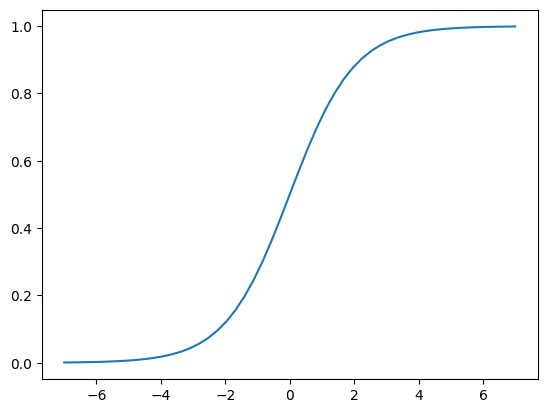

In [340]:
import matplotlib.pyplot as plt
plt.plot(z, sigmoid(z))

# 10 Training logistic regression with Scikit-Learn

In [341]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# we already have our DV and X_train
model.fit(X_train, y_train)

/home/teo/workspace/machine-learning-zoomcamp-homework/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [342]:
# this is the bias (also called intercept)
model.intercept_.round(3)

array([-0.111])

In [343]:
# these are the weights
model.coef_.round(3)

array([[ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
        -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
        -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
         0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
        -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
         0.194, -0.098, -0.205, -0.072,  0.   ]])

In [344]:
# use it
model.predict(X_train)
# these are hard predictions, they already have the exact 0/1 values

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [345]:
model.predict_proba(X_train)
# soft predictions, probabilities for both classes
# why are there 2 columns?
# because for each instance, the probabilities of both classes sum to 1
# first column is for class 0, second column is for class 1
# the second column is our probability of churn (class 1)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

In [346]:
# we can just take the second column:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774], shape=(1409,))

In [347]:
# now we can make the hard decision based on a threshold
churn_decision = (y_pred >= 0.5)

In [348]:
df_val[churn_decision].customerid
# from the validation set, we take only the customers for which our model
# predicts that churn_decision is True, and we get their customer IDs
#
# these are the customers we predict will churn, so we send them a promo offer

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

In [349]:
# how accurate were my predictions?
# no RMSE here, but there are other metrics for classification

# we want to compare
y_val
# with
churn_decision.astype(int)
# and see how many we got right

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [350]:
(y_val == churn_decision).mean()
# ↑ true when they match, then we take the mean to get accuracy

np.float64(0.801277501774308)

In [351]:
# let's look more closely
df_pred = pd.DataFrame() # we put the values vs predictions in a dataframe
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [352]:
df_pred

,probability,prediction,actual
0,0.007863,0,0
1,0.209928,0,0
2,0.223710,0,0
3,0.561123,1,1
4,0.219586,0,0
...,...,...,...
1404,0.297790,0,0
1405,0.035463,0,1
1406,0.150149,0,0
1407,0.776681,1,1


In [353]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual)
df_pred

,probability,prediction,actual,correct
0,0.007863,0,0,True
1,0.209928,0,0,True
2,0.223710,0,0,True
3,0.561123,1,1,True
4,0.219586,0,0,True
...,...,...,...,...
1404,0.297790,0,0,True
1405,0.035463,0,1,False
1406,0.150149,0,0,True
1407,0.776681,1,1,True


In [354]:
df_pred.correct.mean() #as before - our model is 80% accurate

np.float64(0.801277501774308)

# 11 Model interpretation

In [355]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [356]:
# let's go back to look at the coefficients
model.coef_.round(3)

array([[ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
        -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
        -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
         0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
        -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
         0.194, -0.098, -0.205, -0.072,  0.   ]])

In [359]:
# let's put them together with feature names

# zip joins two lists element-wise into a list of tuples
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

In [362]:
# this is very long. what if we train a smaller model?
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [363]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [364]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [366]:
dv_small.get_feature_names_out() # this is a more manageable example

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [367]:
X_train_small = dv_small.transform(dicts_train_small)


In [368]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [370]:
w0 = model_small.intercept_[0] #bias term
w = model_small.coef_[0]      #weights

In [372]:
w0.round(3), w.round(3)

(np.float64(-2.478), array([ 0.971, -0.024, -0.948,  0.027, -0.036]))

In [373]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [376]:
sigmoid(w0)
# w0 = -2.47 which is about 0.08 probability of churn without
# any features.
# in other words, when we know nothing about the customer, the base
# churn probability is quite low, only 8%
#
# we then keep adjusting the score based on feature values
# for example, if the customer has a month-to-month contract,
# we add 1.386 to the score, which increases the probability of churn
# significantly.
# If the customer has a two-year contract, we subtract 1.232 from the score,
# which decreases the probability of churn significantly.

np.float64(0.07741795381166564)

# 12 Using the model

In [377]:
# now we do the final training on the full training set
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [378]:
dicts_full_train[:3] # looks ok

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [379]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [380]:
model = LogisticRegression().fit(X_full_train, y_full_train)

/home/teo/workspace/machine-learning-zoomcamp-homework/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [381]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [383]:
X_test = dv.transform(dicts_test) # only transform, not fit

In [384]:
y_pred = model.predict_proba(X_test)[:, 1]

In [385]:
churn_decision = (y_pred >= 0.5)

In [386]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [390]:
# good, now we can use it
# pick a customer...
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [393]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [394]:
X_small.shape

(1, 45)

In [395]:
model.predict_proba(X_small)[0, 1]

np.float64(0.4979219389473276)

In [399]:
# he probably won't churn, let's check if it's true
y_test[10]
# indeed he won't, good we didn't send him any promo!

np.int64(0)